In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from IPython.display import display 
from PIL import Image
import tensorflow as tf
# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [2]:
# instantiate image data generator using various image augmentation. Seperate 10% of train data for validation
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=.1,
                                  horizontal_flip=True,
                                  featurewise_center=True,
                                featurewise_std_normalization=True,
                                rotation_range=20,
                                width_shift_range=0.2,
                                height_shift_range=0.2,) #included in our dependencies

In [4]:
# create data generator for train data

train_generator = train_datagen.flow_from_directory('flowers_sep/train/', # path to the data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=128,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                   subset='training')

# create data generator for validation data

validation_generator = train_datagen.flow_from_directory('flowers_sep/train/', # path to the data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=128,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                         subset='validation'
                                                        )

Found 3505 images belonging to 5 classes.
Found 387 images belonging to 5 classes.


In [5]:
#import VGG16 model 
base_model = VGG16(weights='imagenet', input_shape=(224,224,3),pooling='avg')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
553467904/553467096 [==============================] - 6s 0us/step


In [6]:
# view base model layers
base_model.layers[:20]

In [7]:
# instantiate sequential model
model = Sequential()

# add VGG layers to newly instantiated model
for layer in base_model.layers[:20]:
    model.add(layer)

In [8]:
# Set the model layer.trainable to equal to false for VGG16 layers
for layer in model.layers:
    layer.trainable = False

In [9]:
#Add dense layers to the pre-weighted model. with 2 relu layers and finally a softmax layer with 5 class output.
model.add(Dense(243, activation='relu'))
model.add(Dense(81, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [10]:
# view model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [11]:
# complile the model, use Adam optimizer
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# calculation of steps per epoch
step_size_train = train_generator.n//train_generator.batch_size

In [13]:
# fit model using train generator and validation generator
history = model.fit_generator(generator = train_generator, 
                    steps_per_epoch = step_size_train, 
                    epochs = 10,validation_data=validation_generator)

Epoch 1/10
27/27 [==============================] - 79s 3s/step - loss: 1.4889 - acc: 0.5619 - val_loss: 0.5898 - val_acc: 0.7468
Epoch 2/10
27/27 [==============================] - 51s 2s/step - loss: 0.6334 - acc: 0.7644 - val_loss: 0.7757 - val_acc: 0.7494
Epoch 3/10
27/27 [==============================] - 49s 2s/step - loss: 0.5292 - acc: 0.8072 - val_loss: 0.5358 - val_acc: 0.8036
Epoch 4/10
27/27 [==============================] - 49s 2s/step - loss: 0.4588 - acc: 0.8336 - val_loss: 0.7228 - val_acc: 0.7881
Epoch 5/10
27/27 [==============================] - 48s 2s/step - loss: 0.4031 - acc: 0.8531 - val_loss: 0.5552 - val_acc: 0.8217
Epoch 6/10
27/27 [==============================] - 45s 2s/step - loss: 0.3773 - acc: 0.8555 - val_loss: 0.8396 - val_acc: 0.7804
Epoch 7/10
27/27 [==============================] - 47s 2s/step - loss: 0.3935 - acc: 0.8553 - val_loss: 0.5456 - val_acc: 0.8165
Epoch 8/10
27/27 [==============================] - 47s 2s/step - loss: 0.3290 - acc: 0.88

In [14]:
# save the model in 2 different file formats for future use
model.save('modelvggv18.h5')
model.save('modelvggv18')

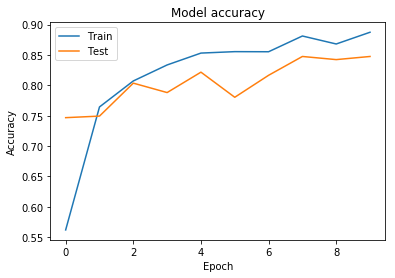

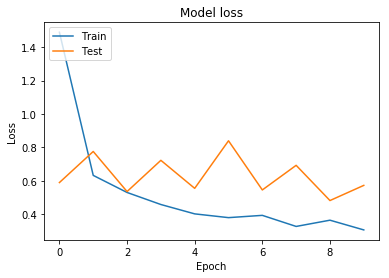

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
# instantiate test data generator
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [17]:
# fit test_generator with image data from test data folder
test_generator = test_datagen.flow_from_directory('flowers_sep/test/', # path to the data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=431,
                                                 class_mode='categorical',
                                                 shuffle=False,
                                                        )

Found 431 images belonging to 5 classes.


In [81]:
# evaluate test data using test_generator

model.evaluate_generator(test_generator)

[0.44176074862480164, 0.84686774]

In [82]:
# create prediction variable using predict_generator
predicts = model.predict_generator(test_generator)

In [20]:
# get the y variable labels
labels = test_generator.class_indices

# create dictionary with the index as the keys
labels = {y:x for x,y in labels.items()}
labels

{0: 'daisy', 1: 'dandelion', 2: 'rose', 3: 'sunflower', 4: 'tulip'}

In [83]:
# Create X and y test variables
X_test, y_test = test_generator.next()

In [22]:
# see that X_test shape is appropriate
X_test.shape

(431, 224, 224, 3)

In [84]:
from sklearn.metrics import confusion_matrix

# create confusion matrix variable of confusion matrix based on Y_test and predictions
matrix = confusion_matrix(y_test.argmax(axis=1), predicts.argmax(axis=1))

In [85]:
# set matrix variable as a dataframe and display sorted classes as columns and index
df = pd.DataFrame(matrix,columns=sorted(classes),index=sorted(classes))
df

,daisy,dandelion,rose,sunflower,tulip
daisy,61,9,4,2,1
dandelion,5,95,2,3,0
rose,1,0,70,2,5
sunflower,2,4,3,62,2
tulip,1,6,11,3,77


In [86]:
from sklearn.metrics import classification_report

# print a classification report of the predicts and y_tests with the target names as the sorted classes
print(classification_report(y_test.argmax(axis=1), predicts.argmax(axis=1), target_names=sorted(classes)))

              precision    recall  f1-score   support

       daisy       0.87      0.79      0.83        77
   dandelion       0.83      0.90      0.87       105
        rose       0.78      0.90      0.83        78
   sunflower       0.86      0.85      0.86        73
       tulip       0.91      0.79      0.84        98

    accuracy                           0.85       431
   macro avg       0.85      0.85      0.85       431
weighted avg       0.85      0.85      0.85       431



In [ ]:
# for purpose of simply viewing some samples of incorrectly predicted items I have simply created new X and y variables directly from the test directory

In [32]:
# create list for image arrays
X = []
# create list for y variable, class tracking 
y= []

classes = list(test_generator.class_indices.keys())

for label in classes:
    direct = (f'flowers_sep/test/{label}')
#     print(direct)
    for fl in os.listdir(f'{direct}'):
        if fl  != '.DS_Store':
            img_file = (f'{direct}/{fl}')
        # create image variable
        # resize image
#             img = load_img(img_file,target_size=(224,224))
#         # convert image to array
#             img = img_to_array(img)
            
            img = Image.open(img_file)
            img = img.resize((224,224))
            img = np.asarray(img)

        # append image array to X list
            X.append(img)
        # append label to y list
            y.append(label)

In [56]:
# create X as numpy array
X=np.array(X)

# divide by 255 to get number out of 1
X=X/255

In [57]:
# one hot encode y values
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
y = to_categorical(y,num_classes=5)

In [61]:
# predict the labels of X
predicts = model.predict(X)

In [62]:
# create a list of incorrect X indexes
incorrect = []

for i in range(1,431):
    pred = np.argmax(predicts[i])
    act = np.argmax(y[i])
    
    if pred != act:
        incorrect.append(i)

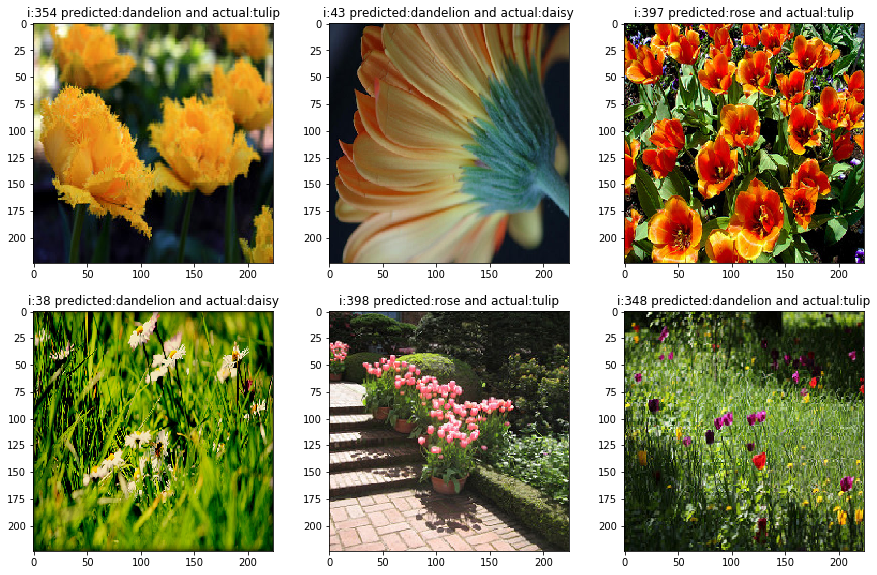

In [77]:
# the below plot is a visualization of some of the images that the above model incorrectly classifies

import random

# Plt a figure area for subplotting 
fig = plt.figure(figsize = (15,15))

for i in range(6):
        # select a random item from 'incorrect' list above
        index = random.choice(incorrect)
        # get the predicted value of the index
        pred = np.argmax(predicts[index])
        # get the actual y value 
        act = np.argmax(y[index])
        
        # plot the item as subplot i + 1
        ax = fig.add_subplot(3,3,i+1)
        # display the image
        ax.imshow(X[index])
        # add a title with the index #, the prediction and the actual 
        ax.set_title(f'i:{index} predicted:{labels[pred]} and actual:{labels[act]}')
   
plt.show()